In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0

In [2]:
# Định nghĩa thư mục dữ liệu
train_dir = './Train'
val_dir = './Test'

# Tạo ImageDataGenerator cho tập huấn luyện và tập kiểm tra
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Tạo generator cho dữ liệu
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # EfficientNetB0 yêu cầu kích thước đầu vào 224x224
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Tải mô hình EfficientNetB0 với trọng số được huấn luyện trước
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Đóng băng các lớp của mô hình cơ sở để không huấn luyện lại
base_model.trainable = False

# Thêm các lớp tùy chỉnh lên trên mô hình EfficientNetB0
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Thay vì Flatten, dùng GlobalAveragePooling2D
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

# Tạo mô hình hoàn chỉnh
model = Model(inputs=base_model.input, outputs=outputs)

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

# Lưu mô hình
model.save('tool_recognition_efficientnet_model.h5')

Found 2774 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.1831 - loss: 1.8237

D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 74s 778ms/step - accuracy: 0.1831 - loss: 1.8235 - val_accuracy: 0.1954 - val_loss: 1.7762
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 72s 821ms/step - accuracy: 0.1869 - loss: 1.7778 - val_accuracy: 0.1954 - val_loss: 1.7745
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 806ms/step - accuracy: 0.1846 - loss: 1.7774 - val_accuracy: 0.1944 - val_loss: 1.7723
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 68s 783ms/step - accuracy: 0.1803 - loss: 1.7786 - val_accuracy: 0.1944 - val_loss: 1.7730
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 808ms/step - accuracy: 0.1719 - loss: 1.7772 - val_accuracy: 0.1944 - val_loss: 1.7687
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 69s 789ms/step - accuracy: 0.1832 - loss: 1.7803 - val_accuracy: 0.1944 - val_loss: 1.7704
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 68s 786ms/step - accuracy: 0.1882 - loss: 1.7767 - val_accuracy: 0.1944 - val_loss: 1.7747
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 68s 785ms/step - accuracy: 0.1910 - loss: 1.7760 - val_accuracy: 0.194

Độ chính xác trên tập kiểm tra: 19.44%


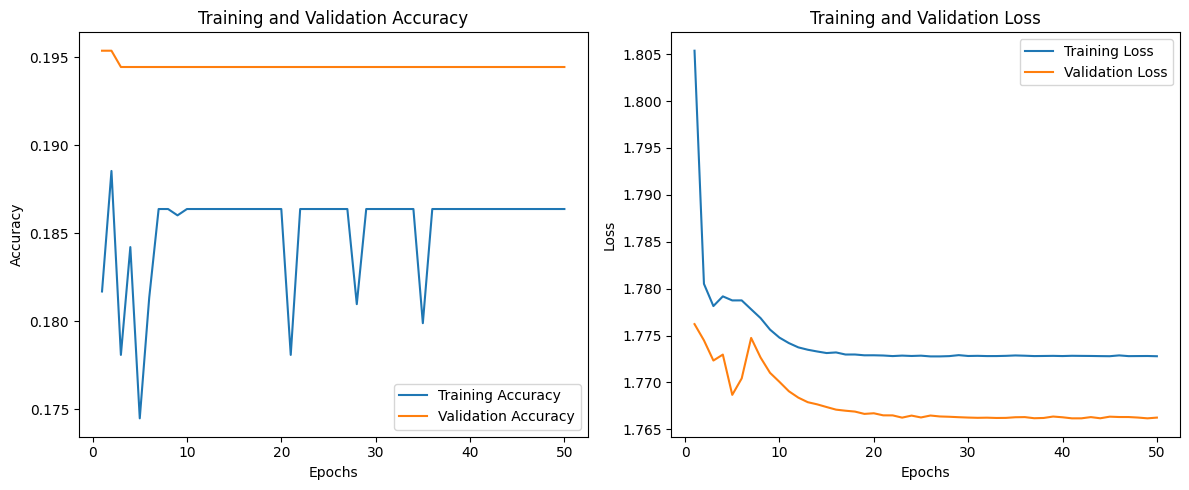

In [3]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()